## Exercise

#### Using non-homogeneous Poisson process, generate the spike train of 100 neurons (if your code is efficient you can also do more, e.g. 200 or 1000)


#### Do this for two different situations:

#### 1) The firing rate $\lambda_t$ is independent for each neuron, and generated as random variables extracted each time step by an exponential distribution $p(\lambda_t) =  r \exp{(- r \lambda_t)}$ with r=0.1. 

#### 2) The firing rate $\lambda_t$ is the same for each neuron, and generated as random variables extracted each time step by an exponential distribution $p(\lambda_t) =  r \exp{(- r \lambda_t)}$ with r=0.1. 

#### For both cases you can use a time step dt=0.01. I remember you that the probability of a spike is $\lambda_t * dt$. Do at least 1000 timesteps.

#### What is the differences in terms of neural avalanches for the two cases? You can, if you want, characterize the avalanches size distributions, remembering that an avalanche size is defined the total number of neurons spiking between two periods of total silence (no neurons spiking).



In [1]:
import numpy as np
import matplotlib.pyplot as plt

Below are functions that simulate spike trains for N neurons for num_steps time steps:

In [2]:
def simulation_case1(N, num_steps):
    # all lambdas are different each time step for each neuron
    spike_train_1 = np.zeros((N, num_steps))

    for i in range(num_steps):
        lmbd1 = np.random.exponential(r, N)
        probs = lmbd1*dt
        random_numbers = np.random.uniform(0, 1, N)
        spikes_each_neuron = [1 if random_numbers[j] <= probs[j] else 0 for j in range(N)]
        spike_train_1[:, i] = spikes_each_neuron
    
    return spike_train_1



def simulation_case2(N, num_steps):
    # same lambda for all neurons, but changes each time step
    spike_train_2 = np.zeros((N,num_steps))

    for i in range(num_steps):
        lmbd2 = np.random.exponential(r)
        prob = lmbd2*dt
        random_numbers = np.random.uniform(0, 1, N)
        spikes_each_neuron = [1 if random_numbers[j] <= prob else 0 for j in range(N)]
        spike_train_2[:, i] = spikes_each_neuron
        
    return spike_train_2

Functions that calculates avalnche size and plot histograms for two cases of simulations:

In [3]:
def calculate_avalanche_size(spike_train):
    #function returns total num of neurons spiking between moments of silence
    
    tot = np.sum(spike_train, axis = 0) #sum of all neurons spiking in a given time
    avalanche = np.array([], dtype = int)

    for i in range(1,len(tot)-1):
        av_num = 0
        if tot[i] != 0 and tot[i-1] == 0: #if it's a start of an avalanche
            av_num += tot[i]
            while tot[i+1]>0:
                i+=1
                av_num += tot[i]
                if i > len(tot)-2: break
            avalanche = np.append(avalanche, av_num)
            
    return avalanche



def histogram(avalanche1, avalanche2, N):
    fig, ax = plt.subplots(figsize=(5,5))
    maxx = max(avalanche1.max(), avalanche2.max())
    ax.hist(avalanche1, bins=np.linspace(0.5,int(maxx)+0.5,int(maxx)+1), alpha=0.3, color='darkblue')
    ax.hist(avalanche2, bins=np.linspace(0.5,int(maxx)+0.5,int(maxx)+1), alpha=0.3, color='red')
    ax.locator_params(axis='x', integer=True)
    ax.set_xlim(0.5, int(maxx)+1)
    ax.set_xlabel("Number of neurons spiking in an avalanche")
    ax.set_ylabel("Number of avalanches")
    ax.legend(["case 1", "case 2"])
    ax.set_title("N = " + str(N))

I want to explore what happens for N = 100, N = 500, n = 1000, N = 2000

In [4]:
dt = 0.01
num_steps = 1000
r = 0.1

N = 100
spike_train_1_100 = simulation_case1(N, num_steps)
spike_train_2_100 = simulation_case2(N, num_steps)

N = 500
spike_train_1_500 = simulation_case1(N, num_steps)
spike_train_2_500 = simulation_case2(N, num_steps)

N = 1000
spike_train_1_1000 = simulation_case1(N, num_steps)
spike_train_2_1000 = simulation_case2(N, num_steps)

N = 2000
spike_train_1_2000 = simulation_case1(N, num_steps)
spike_train_2_2000 = simulation_case2(N, num_steps)

In [5]:
avalanche1_100 = calculate_avalanche_size(spike_train_1_100)
avalanche2_100 = calculate_avalanche_size(spike_train_2_100)

avalanche1_500 = calculate_avalanche_size(spike_train_1_500)
avalanche2_500 = calculate_avalanche_size(spike_train_2_500)

avalanche1_1000 = calculate_avalanche_size(spike_train_1_1000)
avalanche2_1000 = calculate_avalanche_size(spike_train_2_1000)

avalanche1_2000 = calculate_avalanche_size(spike_train_1_2000)
avalanche2_2000 = calculate_avalanche_size(spike_train_2_2000)

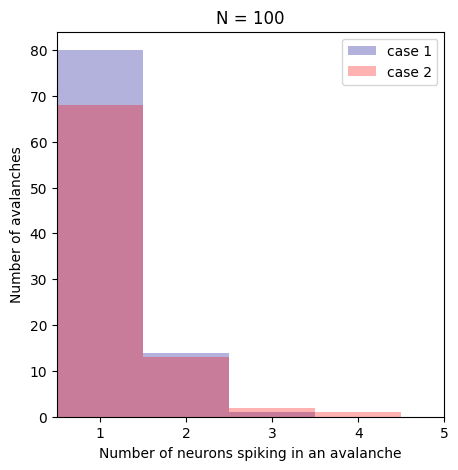

In [6]:
histogram(avalanche1_100, avalanche2_100, 100)

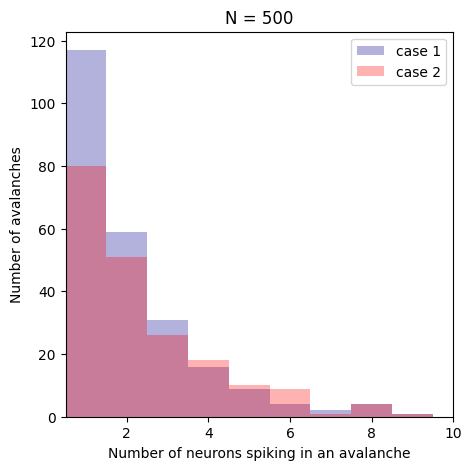

In [7]:
histogram(avalanche1_500, avalanche2_500, 500)

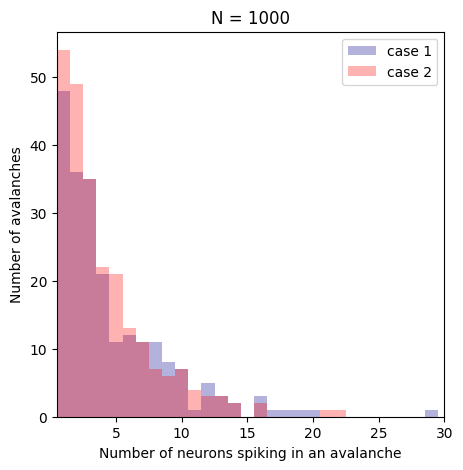

In [8]:
histogram(avalanche1_1000, avalanche2_1000, 1000)

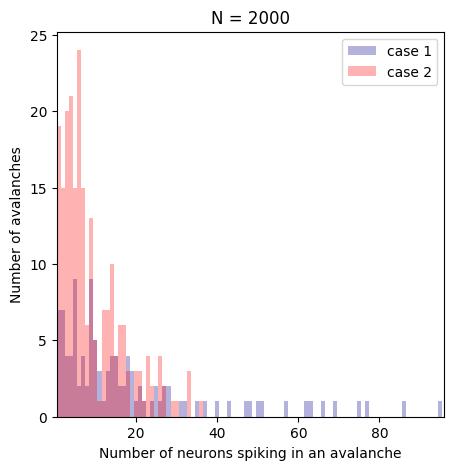

In [9]:
histogram(avalanche1_2000, avalanche2_2000, 2000)

As it can be seen, the avalanche size for the second case has small values more frequently than in the first case. At the same time, the first case gives an opportunity to simulate avalanches of large sizes. However, this difference is seen more for N=2000, but for smaller values of N the difference is not that significant. 